In [1]:
import pandas as pd    
import numpy as np    

# Scikit-learn imports  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression    
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder    
from sklearn.metrics import mean_squared_error 

In [2]:
df = pd.read_csv("car_prediction_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.duplicated().sum()

2

In [6]:
duplicated_columns = df.T.duplicated(keep=False)   

# Display duplicated columns  
duplicate_cols = df.columns[duplicated_columns]  
duplicate_cols

Index([], dtype='object')

In [7]:
duplicated_columns

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [8]:
df.duplicated().sum()

2

In [9]:
df.drop_duplicates(inplace=True) 

In [10]:
df.duplicated().sum()

0

In [11]:
df_new = df.drop(["Seller_Type", "Transmission", "Owner"], axis=1) 

In [12]:
df_new

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type
0,ritz,2014,3.35,5.59,27000,Petrol
1,sx4,2013,4.75,9.54,43000,Diesel
2,ciaz,2017,7.25,9.85,6900,Petrol
3,wagon r,2011,2.85,4.15,5200,Petrol
4,swift,2014,4.60,6.87,42450,Diesel
...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel
297,brio,2015,4.00,5.90,60000,Petrol
298,city,2009,3.35,11.00,87934,Petrol
299,city,2017,11.50,12.50,9000,Diesel


In [13]:
df_new.duplicated().sum()

0

In [14]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
# My independent variables are : Car_Name,Year,Present_Price,Fuel_Type
#  My dependet variable is :Selling_Price

In [16]:
# OUTLIER 

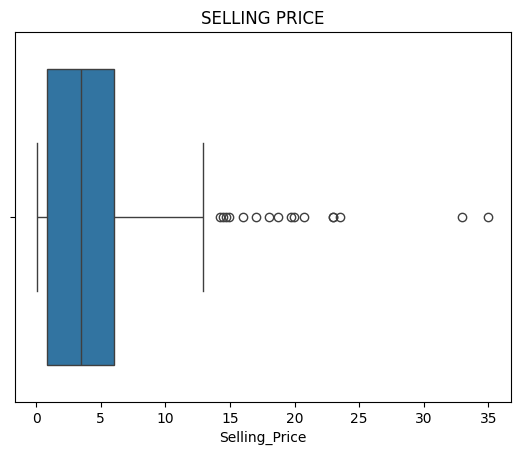

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x = df['Selling_Price'])
plt.title("SELLING PRICE")
plt.show()

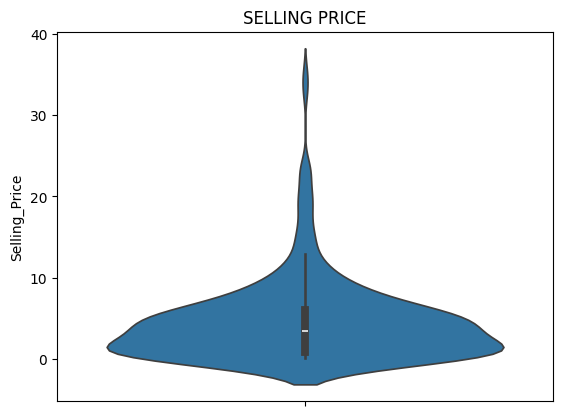

In [18]:
sns.violinplot(df['Selling_Price'])
plt.title("SELLING PRICE")
plt.show()

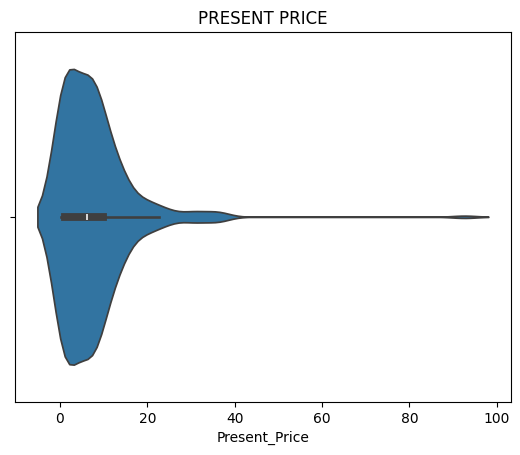

In [19]:
sns.violinplot(x=df['Present_Price'])
plt.title("PRESENT PRICE")
plt.show()

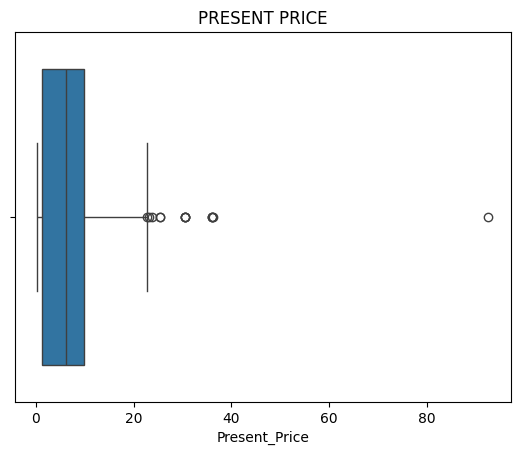

In [20]:
sns.boxplot(x = df['Present_Price'])
plt.title("PRESENT PRICE")
plt.show()

In [21]:
Q1 = df['Present_Price'].quantile(0.25)
Q3 = df['Present_Price'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)
df_remove_outlier_PP = df[(df['Present_Price'] < lower_bound) | (df['Present_Price'] < upper_bound)]
print(df_remove_outlier_PP)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

In [22]:
# Remove outliers
df_cleaned = df[(df['Present_Price'] >= lower_bound) & (df['Present_Price'] <= upper_bound)]
print("New dataset shape:", df_cleaned.shape)

New dataset shape: (285, 9)


In [23]:
df_cleaned

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


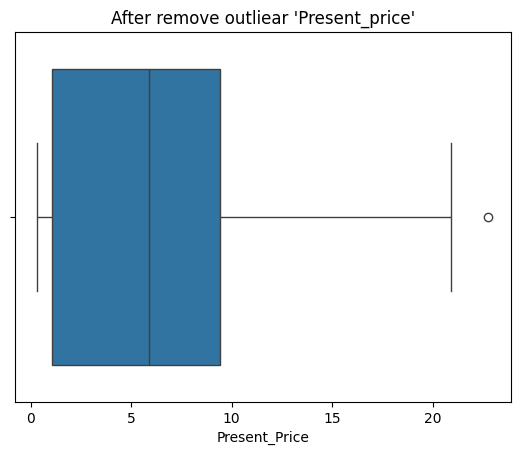

In [24]:
sns.boxplot(x=df_cleaned['Present_Price'])
plt.title("After remove outliear 'Present_price'")
plt.show()

In [25]:
# NOW SELLINF PRICE REMOVE OUTLIER
Q1 = df['Selling_Price'].quantile(0.25)
Q3 = df['Selling_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)
outlier_s = df[(df['Selling_Price'] < lower_bound) | (df['Selling_Price'] < upper_bound)]
outlier_s

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [26]:
df_cleaned_s = df[(df['Selling_Price'] >= lower_bound) & (df['Selling_Price'] <= upper_bound)]
print("New dataset shape:", df_cleaned.shape)

New dataset shape: (285, 9)


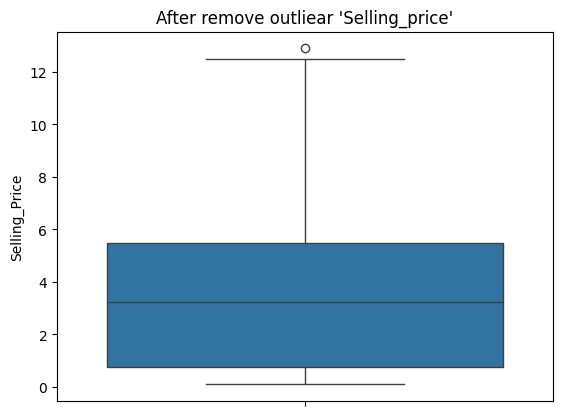

In [27]:
sns.boxplot(df_cleaned_s['Selling_Price'])
plt.title("After remove outliear 'Selling_price'")
plt.show()

In [28]:
df_new["Selling_Price"] = df_cleaned_s["Selling_Price"]
df_new["Present_Price"] = df_cleaned["Present_Price"]

In [29]:
df_new

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type
0,ritz,2014,3.35,5.59,27000,Petrol
1,sx4,2013,4.75,9.54,43000,Diesel
2,ciaz,2017,7.25,9.85,6900,Petrol
3,wagon r,2011,2.85,4.15,5200,Petrol
4,swift,2014,4.60,6.87,42450,Diesel
...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel
297,brio,2015,4.00,5.90,60000,Petrol
298,city,2009,3.35,11.00,87934,Petrol
299,city,2017,11.50,12.50,9000,Diesel


In [30]:
df_new.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
296,False,False,False,False,False,False
297,False,False,False,False,False,False
298,False,False,False,False,False,False
299,False,False,False,False,False,False


In [31]:
print(df_new.isnull().sum())

Car_Name          0
Year              0
Selling_Price    16
Present_Price    14
Kms_Driven        0
Fuel_Type         0
dtype: int64


In [32]:
print(df[["Selling_Price", "Present_Price"]].head()) 

   Selling_Price  Present_Price
0           3.35           5.59
1           4.75           9.54
2           7.25           9.85
3           2.85           4.15
4           4.60           6.87


In [33]:
columns_to_fill = ["Selling_Price", "Present_Price"]  
df_new[columns_to_fill] = df_new[columns_to_fill].fillna(df_new[columns_to_fill].mean())

In [34]:
df_new

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type
0,ritz,2014,3.35,5.59,27000,Petrol
1,sx4,2013,4.75,9.54,43000,Diesel
2,ciaz,2017,7.25,9.85,6900,Petrol
3,wagon r,2011,2.85,4.15,5200,Petrol
4,swift,2014,4.60,6.87,42450,Diesel
...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel
297,brio,2015,4.00,5.90,60000,Petrol
298,city,2009,3.35,11.00,87934,Petrol
299,city,2017,11.50,12.50,9000,Diesel


In [35]:
df_new.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
dtype: int64

In [36]:
df_new

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type
0,ritz,2014,3.35,5.59,27000,Petrol
1,sx4,2013,4.75,9.54,43000,Diesel
2,ciaz,2017,7.25,9.85,6900,Petrol
3,wagon r,2011,2.85,4.15,5200,Petrol
4,swift,2014,4.60,6.87,42450,Diesel
...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel
297,brio,2015,4.00,5.90,60000,Petrol
298,city,2009,3.35,11.00,87934,Petrol
299,city,2017,11.50,12.50,9000,Diesel


In [37]:
df.to_csv("cleaned_car_data.csv", index=False)

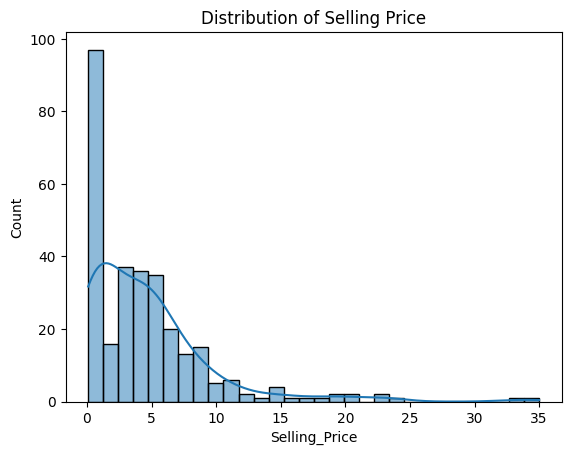

In [38]:
sns.histplot(df["Selling_Price"], bins=30, kde=True)
plt.title("Distribution of Selling Price")
plt.show()


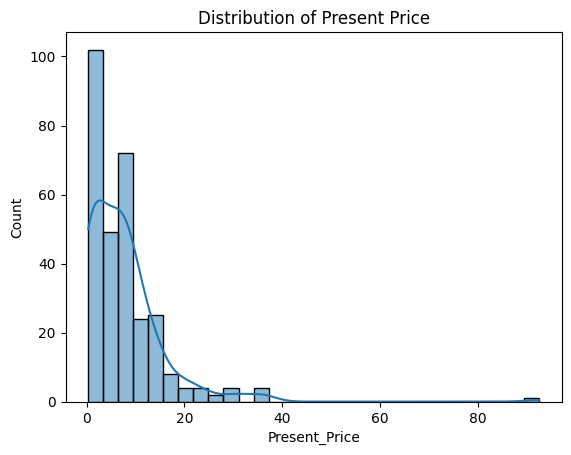

In [39]:
sns.histplot(df["Selling_Price"], bins=30, kde=True)
plt.title("Distribution of Selling Price")
plt.show()


In [40]:
df_new

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type
0,ritz,2014,3.35,5.59,27000,Petrol
1,sx4,2013,4.75,9.54,43000,Diesel
2,ciaz,2017,7.25,9.85,6900,Petrol
3,wagon r,2011,2.85,4.15,5200,Petrol
4,swift,2014,4.60,6.87,42450,Diesel
...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel
297,brio,2015,4.00,5.90,60000,Petrol
298,city,2009,3.35,11.00,87934,Petrol
299,city,2017,11.50,12.50,9000,Diesel


In [41]:
print(type(df))
print(type(df_new))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [42]:
# Ensure 'Car_Name' is a valid column
if isinstance(df_new, pd.DataFrame) and isinstance(df_new, pd.DataFrame):
    if 'Car_Name' in df_new.columns and 'Car_Name' in df_new.columns:
        car_counts = df_new['Car_Name'].value_counts().to_dict()
        df_new['Car_Name'] = df_new['Car_Name'].map(car_counts).fillna(0)
    else:
        print("Error: 'Car_Name' column not found in one of the DataFrames.")
else:
    print("Error: df or df_new is not a DataFrame.")


In [43]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [44]:
if 'Car_Name' in df.columns:
    print("Car_Name column exists")
else:
    print("Car_Name column is missing")

Car_Name column exists


In [45]:
type(df_new)

pandas.core.frame.DataFrame

In [102]:
#Frequency Encoding
df_new.rename(columns=lambda x: x.strip(), inplace=True)

In [104]:
if 'Car_Name' in df.columns:
    df['Car_Name'] = df['Car_Name'].map(df['Car_Name'].value_counts().to_dict())
    print("Frequency Encoding applied successfully!")
else:
    print("'Car_Name' column NOT found in df!")

Frequency Encoding applied successfully!


In [126]:
df_new.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Type_1,Fuel_Type_2
0,24,2014,3.35,5.59,27000,Dealer,Manual,0,False,True
1,12,2013,4.75,9.54,43000,Dealer,Manual,0,True,False
2,27,2017,7.25,9.85,6900,Dealer,Manual,0,False,True
3,24,2011,2.85,4.15,5200,Dealer,Manual,0,False,True
4,20,2014,4.60,6.87,42450,Dealer,Manual,0,True,False
5,47,2018,9.25,9.83,2071,Dealer,Manual,0,True,False
6,27,2015,6.75,8.12,18796,Dealer,Manual,0,False,True
7,47,2015,6.50,8.61,33429,Dealer,Manual,0,True,False
8,27,2016,8.75,8.89,20273,Dealer,Manual,0,True,False
9,27,2015,7.45,8.92,42367,Dealer,Manual,0,True,False


In [120]:
le = LabelEncoder()
df_new['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df_new[['Fuel_Type']].head()

,Fuel_Type
0,2
1,1
2,2
3,2
4,1


In [140]:
df_new = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

In [142]:
df_new.drop(columns=['Seller_Type', 'Transmission', 'Owner'], inplace=True)

In [150]:
df_new.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_1,Fuel_Type_2
0,24,2014,3.35,5.59,27000,False,True
1,12,2013,4.75,9.54,43000,True,False
2,27,2017,7.25,9.85,6900,False,True
3,24,2011,2.85,4.15,5200,False,True
4,20,2014,4.60,6.87,42450,True,False


In [251]:
# Step 1: Check column names in df_new
print("Columns in df_new:", df_new.columns)

# Step 2: Rename columns to remove spaces
df_new.rename(columns=lambda x: x.strip(), inplace=True)

# Step 3: Ensure 'Fuel_Type' exists before encoding
if 'Fuel_Type' in df_new.columns:
    df_new = pd.get_dummies(df_new, columns=['Fuel_Type'], drop_first=True)
    print("One-Hot Encoding applied to Fuel_Type in df_new!")
else:
    print("'Fuel_Type' column NOT found in df_new!")

# Step 4: Remove unwanted columns
df_new.drop(columns=['Seller_Type', 'Transmission', 'Owner'], errors='ignore', inplace=True)

# Step 5: Check the final dataset
print(df_new.head())


Columns in df_new: Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Diesel', 'Fuel_CNG'],
      dtype='object')
'Fuel_Type' column NOT found in df_new!
   Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Diesel  \
0        24  2014           3.35           5.59       27000            0   
1        12  2013           4.75           9.54       43000            1   
2        27  2017           7.25           9.85        6900            0   
3        24  2011           2.85           4.15        5200            0   
4        20  2014           4.60           6.87       42450            1   

   Fuel_CNG  
0         1  
1         0  
2         1  
3         1  
4         0  


In [161]:
print(df_new[['Fuel_Type_1', 'Fuel_Type_2']].head(10))


   Fuel_Type_1  Fuel_Type_2
0        False         True
1         True        False
2        False         True
3        False         True
4         True        False
5         True        False
6        False         True
7         True        False
8         True        False
9         True        False


In [163]:
df_new.rename(columns={'Fuel_Type_1': 'Fuel_Diesel', 'Fuel_Type_2': 'Fuel_CNG'}, inplace=True)

In [165]:
df_new.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Diesel,Fuel_CNG
0,24,2014,3.35,5.59,27000,False,True
1,12,2013,4.75,9.54,43000,True,False
2,27,2017,7.25,9.85,6900,False,True
3,24,2011,2.85,4.15,5200,False,True
4,20,2014,4.60,6.87,42450,True,False
5,47,2018,9.25,9.83,2071,True,False
6,27,2015,6.75,8.12,18796,False,True
7,47,2015,6.50,8.61,33429,True,False
8,27,2016,8.75,8.89,20273,True,False
9,27,2015,7.45,8.92,42367,True,False


In [167]:
df_new = df_new.astype({col: int for col in df_new.select_dtypes(include=['bool']).columns})


In [169]:
df_new

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Diesel,Fuel_CNG
0,24,2014,3.35,5.59,27000,0,1
1,12,2013,4.75,9.54,43000,1,0
2,27,2017,7.25,9.85,6900,0,1
3,24,2011,2.85,4.15,5200,0,1
4,20,2014,4.60,6.87,42450,1,0
...,...,...,...,...,...,...,...
296,26,2016,9.50,11.60,33988,1,0
297,20,2015,4.00,5.90,60000,0,1
298,26,2009,3.35,11.00,87934,0,1
299,26,2017,11.50,12.50,9000,1,0


In [175]:
df_new.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Diesel      0
Fuel_CNG         0
dtype: int64

In [177]:
# now ml model

In [233]:
X = df_new[['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Diesel', 'Fuel_CNG']]
y = df_new['Selling_Price']

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [255]:
model = LinearRegression()
model

LinearRegression()

In [257]:
model.fit(x_train,y_train)

LinearRegression()

In [259]:
y_pred = model.predict(x_test)
y_pred

array([ 4.13780423e+00,  1.00522910e+01,  3.28861405e+00,  1.00004565e+01,
        3.61337194e+00,  4.26244889e+00,  4.42720093e+00,  4.29659630e+00,
        8.90685426e+00,  1.42469612e+00,  8.26117429e+00,  1.03222710e+00,
       -3.01055943e-01,  3.03323304e+00,  3.51206119e+00,  4.03704635e+00,
        3.82077658e+00,  3.40430156e+00,  1.07388204e+01,  3.43699959e+00,
        3.63010398e+00,  1.56954579e+00,  4.23969051e+00,  6.04592641e-01,
        9.82890733e+00,  3.93380562e+00,  1.00613704e+01,  4.44635762e+00,
        3.76252933e+00,  4.82055625e+00,  3.61662231e+00,  3.92779107e+00,
        9.81086008e+00,  2.39265697e+00,  4.09001578e+00,  8.13400653e+00,
        4.24968886e+00,  1.08385112e+01,  2.99651856e+00,  2.82268046e+00,
        4.92666543e+00,  9.89941502e+00,  2.31858978e+00, -6.79742109e-01,
        2.10371654e+00, -3.41636391e-03,  4.12195624e+00,  3.78493061e+00,
        3.08835954e+00,  1.57709810e+00,  2.61361007e+00,  1.10478755e+00,
        4.77586222e-01,  

In [261]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [263]:
print("Mean Absolute Error:",mae)
print("Mean Sqaures Error:",mse)
print("R2",r2)

Mean Absolute Error: 2.41117434271237
Mean Sqaures Error: 15.891467426014371
R2 0.38341265110349787


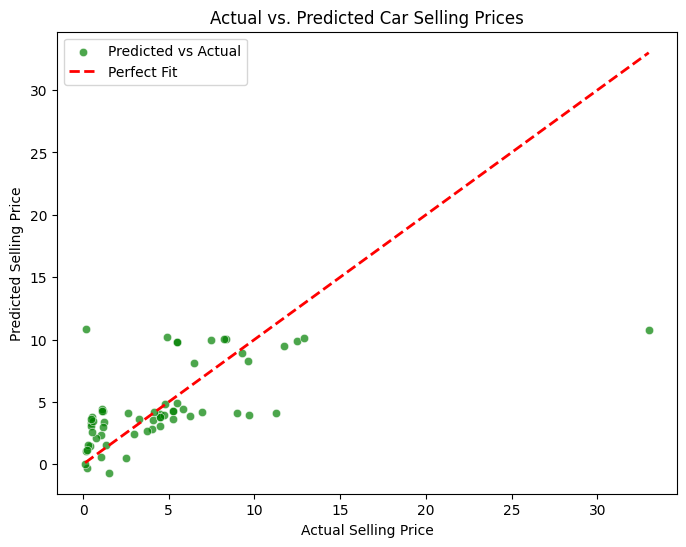

In [265]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='green', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed', linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Car Selling Prices")
plt.legend()
plt.show()